In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib as plt
import seaborn as sn
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_excel('Data Entry 1.xlsx')

In [3]:
df


,ID,Hemoglobin,WBC,WBC T,Neutrophils,Lymphocytes,PLT,PLT T,MPV,PCT,PDW,RBC,HCT,MCV,MCH,MCHC,RDWCV,RDWSD,PLCR,Target
0,1,7.3,10.0,10000.0,50.1,43.2,189.0,189000,9.2,0.17,12.5,2.77,24.2,87.7,26.3,30.1,11.4,35.3,22.30,1
1,2,7.3,10.0,10000.0,52.3,42.4,180.0,180000,8.9,0.16,12.5,2.84,25.0,88.2,25.7,20.2,11.4,35.3,19.50,1
2,3,9.0,7.2,7200.0,60.7,30.7,148.0,148000,10.1,0.14,14.3,3.97,30.5,77.0,22.6,29.5,13.7,37.2,30.50,0
3,4,3.8,6.0,6000.0,63.5,30.2,143.0,143000,8.6,0.12,11.3,4.22,32.8,77.9,23.2,29.8,17.0,46.5,16.40,0
4,5,0.4,4.2,4200.0,53.7,39.1,236.0,236000,19.5,0.22,12.8,3.93,316.0,80.6,23.9,29.7,15.1,42.7,24.80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,13.2,2.7,2700.0,49.5,43.4,169.0,169000,10.1,0.17,14.3,4.77,41.2,86.4,27.4,31.7,12.2,37.2,28.60,1
496,497,11.6,6.2,6200.0,57.6,35.0,177.0,177000,9.9,0.18,13.6,4.82,37.0,76.7,24.0,31.4,13.8,37.2,29.00,1
497,498,9.9,8.4,8400.0,63.5,29.2,133.1,133100,9.6,0.12,12.8,4.40,30.3,68.8,22.7,33.0,10.6,38.0,24.60,0
498,499,7.4,7.4,7400.0,72.5,19.0,125.0,125000,10.7,0.13,15.9,3.34,23.6,70.6,21.9,30.9,11.0,36.2,33.60,0


In [4]:
df= df.drop(columns=['PLT','WBC'])

In [5]:
df= df.drop("ID",axis=1)

In [6]:
df.sample(10)

,Hemoglobin,WBC T,Neutrophils,Lymphocytes,PLT T,MPV,PCT,PDW,RBC,HCT,MCV,MCH,MCHC,RDWCV,RDWSD,PLCR,Target
184,11.6,4700.0,53.9,37.5,202000,8.8,0.17,11.8,4.30,37.0,86.2,26.9,31.3,12.3,37.2,17.7,1
40,13.9,12800.0,78.5,13.1,164000,9.2,0.15,12.3,5.77,44.6,77.4,24.0,31.1,13.7,37.2,22.1,3
291,13.8,5500.0,61.9,30.4,177000,9.3,0.16,12.3,4.79,41.7,87.2,28.8,33.0,12.1,37.2,22.1,1
377,13.1,2700.0,49.5,43.4,169000,10.1,0.17,14.3,4.77,41.2,74.1,27.4,31.7,12.2,37.2,28.6,1
396,11.3,5700.0,65.1,27.7,161000,9.5,0.15,13.1,4.38,37.2,85.0,25.7,30.3,13.7,40.9,24.4,1
271,14.5,10900.0,79.5,11.9,45000,11.5,0.05,21.8,4.89,14.0,91.2,90.0,32.9,12.7,40.9,43.8,0
259,13.4,8800.0,81.2,11.0,162000,9.1,0.14,12.8,4.80,41.5,86.5,27.9,32.2,12.2,37.2,20.9,1
404,35.2,3800.0,54.7,36.6,119000,10.7,0.12,17.9,10.90,81.2,25.1,10.9,30.9,11.7,33.4,36.4,3
165,11.7,6800.0,69.3,22.6,192000,9.6,0.18,12.5,4.24,38.1,90.0,27.5,30.7,11.7,37.2,24.0,1
429,13.4,3700.0,70.9,17.3,92000,9.7,0.08,12.3,4.70,41.0,87.3,28.5,32.6,12.1,37.2,25.2,0


In [7]:
df['PLT']= df['PLT T']

In [8]:
df=df.drop('PLT T',axis=1)

In [9]:
df['WBC']= df['WBC T']


In [10]:
df=df.drop('WBC T',axis=1)

In [11]:
df

,Hemoglobin,Neutrophils,Lymphocytes,MPV,PCT,PDW,RBC,HCT,MCV,MCH,MCHC,RDWCV,RDWSD,PLCR,Target,PLT,WBC
0,7.3,50.1,43.2,9.2,0.17,12.5,2.77,24.2,87.7,26.3,30.1,11.4,35.3,22.30,1,189000,10000.0
1,7.3,52.3,42.4,8.9,0.16,12.5,2.84,25.0,88.2,25.7,20.2,11.4,35.3,19.50,1,180000,10000.0
2,9.0,60.7,30.7,10.1,0.14,14.3,3.97,30.5,77.0,22.6,29.5,13.7,37.2,30.50,0,148000,7200.0
3,3.8,63.5,30.2,8.6,0.12,11.3,4.22,32.8,77.9,23.2,29.8,17.0,46.5,16.40,0,143000,6000.0
4,0.4,53.7,39.1,19.5,0.22,12.8,3.93,316.0,80.6,23.9,29.7,15.1,42.7,24.80,1,236000,4200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,13.2,49.5,43.4,10.1,0.17,14.3,4.77,41.2,86.4,27.4,31.7,12.2,37.2,28.60,1,169000,2700.0
496,11.6,57.6,35.0,9.9,0.18,13.6,4.82,37.0,76.7,24.0,31.4,13.8,37.2,29.00,1,177000,6200.0
497,9.9,63.5,29.2,9.6,0.12,12.8,4.40,30.3,68.8,22.7,33.0,10.6,38.0,24.60,0,133100,8400.0
498,7.4,72.5,19.0,10.7,0.13,15.9,3.34,23.6,70.6,21.9,30.9,11.0,36.2,33.60,0,125000,7400.0


In [12]:
X= df.drop('Target',axis=1)
X

,Hemoglobin,Neutrophils,Lymphocytes,MPV,PCT,PDW,RBC,HCT,MCV,MCH,MCHC,RDWCV,RDWSD,PLCR,PLT,WBC
0,7.3,50.1,43.2,9.2,0.17,12.5,2.77,24.2,87.7,26.3,30.1,11.4,35.3,22.30,189000,10000.0
1,7.3,52.3,42.4,8.9,0.16,12.5,2.84,25.0,88.2,25.7,20.2,11.4,35.3,19.50,180000,10000.0
2,9.0,60.7,30.7,10.1,0.14,14.3,3.97,30.5,77.0,22.6,29.5,13.7,37.2,30.50,148000,7200.0
3,3.8,63.5,30.2,8.6,0.12,11.3,4.22,32.8,77.9,23.2,29.8,17.0,46.5,16.40,143000,6000.0
4,0.4,53.7,39.1,19.5,0.22,12.8,3.93,316.0,80.6,23.9,29.7,15.1,42.7,24.80,236000,4200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,13.2,49.5,43.4,10.1,0.17,14.3,4.77,41.2,86.4,27.4,31.7,12.2,37.2,28.60,169000,2700.0
496,11.6,57.6,35.0,9.9,0.18,13.6,4.82,37.0,76.7,24.0,31.4,13.8,37.2,29.00,177000,6200.0
497,9.9,63.5,29.2,9.6,0.12,12.8,4.40,30.3,68.8,22.7,33.0,10.6,38.0,24.60,133100,8400.0
498,7.4,72.5,19.0,10.7,0.13,15.9,3.34,23.6,70.6,21.9,30.9,11.0,36.2,33.60,125000,7400.0


In [13]:
y= df['Target']

In [14]:
y

0      1
1      1
2      0
3      0
4      1
      ..
495    1
496    1
497    0
498    0
499    3
Name: Target, Length: 500, dtype: int64

In [15]:
 X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)



In [16]:
 X_train

,Hemoglobin,Neutrophils,Lymphocytes,MPV,PCT,PDW,RBC,HCT,MCV,MCH,MCHC,RDWCV,RDWSD,PLCR,PLT,WBC
238,13.1,74.3,18.6,8.6,0.22,12.5,4.73,30.2,63.9,17.1,26.8,14.9,33.4,19.00,260000,9000.0
438,9.2,84.7,9.5,9.7,0.10,13.1,3.34,28.4,85.3,275.0,32.3,13.0,39.0,26.70,107000,4200.0
475,9.5,70.2,20.7,10.8,0.17,16.1,3.84,31.2,81.4,24.7,30.4,13.6,39.0,35.30,160000,4900.0
58,8.9,53.2,40.5,9.9,0.07,9.7,4.56,31.3,68.7,19.5,28.4,14.6,35.3,35.50,77000,4500.0
380,8.8,75.4,15.5,10.6,0.08,15.1,3.52,28.6,81.4,25.0,30.7,13.6,39.0,34.30,80000,4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,14.6,60.5,32.0,8.8,0.16,11.8,5.38,45.8,85.2,27.1,31.8,11.8,35.3,0.18,182000,5100.0
72,9.3,55.2,37.1,10.8,0.18,12.8,5.25,33.0,62.9,17.7,28.1,14.3,31.6,41.40,171000,4200.0
396,11.3,65.1,27.7,9.5,0.15,13.1,4.38,37.2,85.0,25.7,30.3,13.7,40.9,24.40,161000,5700.0
235,15.2,70.2,17.5,9.5,0.08,12.0,5.50,46.8,85.2,27.6,32.4,13.0,39.0,22.40,86000,10800.0


In [17]:
missing_values = df.isnull().sum()
print('Missing values in each column:\n', missing_values)

Missing values in each column:
 Hemoglobin      0
Neutrophils     0
Lymphocytes     0
MPV             0
PCT             0
PDW             0
RBC             0
HCT             0
MCV             0
MCH             0
MCHC            0
RDWCV           0
RDWSD           0
PLCR            0
Target          0
PLT             0
WBC             0
dtype: int64


In [18]:
if df.iloc[:,-1].dtype == 'object' or len(df.iloc[:,-1].unique()) < 10: # Object dtype or few unique values
    target_balance =  X_train.iloc[:,-1].value_counts()
    print('\nTarget variable balance:\n', target_balance)

In [19]:
df.iloc[:,-1]

0      10000.0
1      10000.0
2       7200.0
3       6000.0
4       4200.0
        ...   
495     2700.0
496     6200.0
497     8400.0
498     7400.0
499    12900.0
Name: WBC, Length: 500, dtype: float64

In [20]:
df.head(18)

,Hemoglobin,Neutrophils,Lymphocytes,MPV,PCT,PDW,RBC,HCT,MCV,MCH,MCHC,RDWCV,RDWSD,PLCR,Target,PLT,WBC
0,7.3,50.1,43.2,9.2,0.17,12.5,2.77,24.2,87.7,26.3,30.1,11.4,35.3,22.3,1,189000,10000.0
1,7.3,52.3,42.4,8.9,0.16,12.5,2.84,25.0,88.2,25.7,20.2,11.4,35.3,19.5,1,180000,10000.0
2,9.0,60.7,30.7,10.1,0.14,14.3,3.97,30.5,77.0,22.6,29.5,13.7,37.2,30.5,0,148000,7200.0
3,3.8,63.5,30.2,8.6,0.12,11.3,4.22,32.8,77.9,23.2,29.8,17.0,46.5,16.4,0,143000,6000.0
4,0.4,53.7,39.1,19.5,0.22,12.8,3.93,316.0,80.6,23.9,29.7,15.1,42.7,24.8,1,236000,4200.0
5,8.8,65.4,27.3,9.0,0.18,11.5,3.96,29.7,75.2,22.2,79.6,13.3,35.3,20.0,1,207000,6600.0
6,14.2,68.2,19.1,9.7,0.14,12.8,5.15,44.8,87.1,27.5,31.6,12.7,39.0,26.6,3,151000,16700.0
7,12.0,64.0,27.4,10.2,0.19,15.9,4.39,37.9,86.4,27.3,31.6,12.2,37.2,31.1,1,194000,9300.0
8,13.2,72.4,19.7,8.7,0.15,10.0,4.85,41.0,84.7,27.2,32.1,11.8,35.3,15.9,1,181000,5200.0
9,12.4,79.0,12.4,8.6,0.14,11.3,4.57,38.9,85.3,27.1,31.8,12.4,37.2,16.7,1,164000,10500.0


In [21]:
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns


In [22]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])


In [23]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features)])

In [24]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Hemoglobin', 'Neutrophils', 'Lymphocytes ', 'MPV', 'PCT', 'PDW', 'RBC',
       'HCT', 'MCV', 'MCH', 'MCHC', 'RDWCV', 'RDWSD', 'PLCR', 'PLT', 'WBC'],
      dtype='object'))])

In [25]:
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)
X_train_transformed

array([[ 0.20147484, -0.02509793, -0.63809168, ..., -1.01833056,
         1.40073564,  0.49174428],
       [-0.43182576,  0.01428028, -1.50101846, ...,  0.05998294,
        -1.03183544, -0.98510386],
       [-0.38311033, -0.04062204, -0.43895473, ...,  1.26433308,
        -0.1891801 , -0.76973017],
       ...,
       [-0.09081774, -0.05993251,  0.2248351 , ..., -0.2621107 ,
        -0.17328094, -0.52358882],
       [ 0.54248286, -0.04062204, -0.74240151, ..., -0.54219213,
        -1.36571774,  1.04556233],
       [ 0.6561522 , -0.0133602 , -1.15015812, ...,  1.13829644,
        -0.84104555, -0.21591212]])

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score


gb =  DecisionTreeClassifier(random_state=42)


gb_model = gb.fit(X_train_transformed, y_train)
y_pred = gb_model.predict(X_test_transformed)
accuracy = accuracy_score(y_test, y_pred)
print("Decision",accuracy)
# scores = {
#     # Train model
#     model.fit(X_train_transformed, y_train)
#     # Predict on test set
#     y_pred = model.predict(X_test_transformed)
#     # Calculate accuracy
#     accuracy = accuracy_score(y_test, y_pred)
#     scores[model_name] = accuracy

# # Display the accuracy of each model
# for model_name, accuracy in scores.items():
#     print(f'{model_name}: {accuracy:.2f}')

Decision 0.96


In [27]:
X_test.head()

,Hemoglobin,Neutrophils,Lymphocytes,MPV,PCT,PDW,RBC,HCT,MCV,MCH,MCHC,RDWCV,RDWSD,PLCR,PLT,WBC
304,10.3,57.5,35.6,10.6,0.12,17.7,4.59,36.3,79.1,22.4,28.3,12.7,35.3,34.2,122000,7600.0
340,12.2,60.2,30.7,9.0,0.11,10.7,3.62,36.5,101.1,33.7,33.4,15.7,53.9,20.1,130000,4100.0
47,11.7,43.6,49.0,9.7,0.25,12.5,4.35,34.5,79.4,26.8,33.9,12.6,35.3,25.2,262000,4700.0
67,9.3,76.3,13.1,10.0,0.22,13.3,4.72,32.9,69.8,19.7,28.2,14.4,35.3,32.7,227000,7000.0
479,14.5,61.8,30.7,8.2,0.22,10.2,4.92,35.7,72.6,23.3,32.2,13.8,35.3,37.1,127000,13700.0


In [28]:


# Hemoglobin = input('Enter Hemoglobin: ')
# Neutrophils = input('Enter Neutrophils: ')
# Lymphocytes = input('Enter Lymphocytes: ')
# MPV = input('Enter MPV: ')
# PCT = input('Enter PCT: ')
# PDW = input('Enter PDW: ')
# RBC = input('Enter RBC: ')
# HCT = input('Enter HCT: ')
# MCV = input('Enter MCV: ')
# MCH = input('Enter MCH: ')
# MCHC = input('Enter MCHC: ')
# RDWCV = input('Enter RDWCV: ')
# RDWSD = input('Enter RDWSD: ')
# PLCR = input('Enter PLCR: ')
# PLT = input('Enter PLT: ')
# WBC = input('Enter WBC: ')

# # Assume you have a trained model
# model_my = gb_model

# # Assume numerical_features is a list of numerical feature names
# numerical_features = ['Hemoglobin', 'Neutrophils', 'Lymphocytes', 'MPV', 'PCT', 'PDW', 'RBC', 'HCT', 'MCV', 'MCH', 'MCHC', 'RDWCV', 'RDWSD', 'PLCR', 'PLT', 'WBC']

# # Convert individual values to float if they are non-empty strings
# Hemoglobin, Neutrophils, Lymphocytes, MPV, PCT, PDW, RBC, HCT, MCV, MCH, MCHC, RDWCV, RDWSD, PLCR, PLT, WBC = map(lambda x: float(x) if x.strip() else float('nan'), [Hemoglobin, Neutrophils, Lymphocytes, MPV, PCT, PDW, RBC, HCT, MCV, MCH, MCHC, RDWCV, RDWSD, PLCR, PLT, WBC])

# # Reshape the list into a 2D array
# blood_parameters = [[Hemoglobin, Neutrophils, Lymphocytes, MPV, PCT, PDW, RBC, HCT, MCV, MCH, MCHC, RDWCV, RDWSD, PLCR, PLT, WBC]]

# blood_parameters = np.array(blood_parameters).reshape(1, -1)

# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('scaler', StandardScaler())])

# # Update the ColumnTransformer to use numerical_features indices
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, [numerical_features.index(feature) for feature in numerical_features])])

# preprocessor.fit(blood_parameters)
# X_train_transformed_my = preprocessor.transform(blood_parameters)
# y_pred = model_my.predict(X_train_transformed_my)

# print("People health:", y_pred)
# print(blood_parameters)


In [29]:
df.sample(5)

,Hemoglobin,Neutrophils,Lymphocytes,MPV,PCT,PDW,RBC,HCT,MCV,MCH,MCHC,RDWCV,RDWSD,PLCR,Target,PLT,WBC
379,9.1,72.5,19.0,10.5,0.07,15.6,3.60,29.2,81.2,25.2,31.1,13.7,39.0,31.7,0,76000,4000.0
267,11.3,78.4,16.2,9.8,0.15,13.1,4.27,36.5,85.7,26.4,30.9,12.3,37.2,25.2,1,155000,5900.0
292,3.1,67.6,23.2,8.9,0.22,12.0,1.42,10.1,71.8,21.8,30.6,15.5,39.0,20.3,3,250000,21100.0
5,8.8,65.4,27.3,9.0,0.18,11.5,3.96,29.7,75.2,22.2,79.6,13.3,35.3,20.0,1,207000,6600.0
165,11.7,69.3,22.6,9.6,0.18,12.5,4.24,38.1,90.0,27.5,30.7,11.7,37.2,24.0,1,192000,6800.0


In [30]:
# Hemoglobin = input('Enter Hemoglobin: ')
# Neutrophils = input('Enter Neutrophils: ')
# Lymphocytes = input('Enter Lymphocytes: ')
# MPV = input('Enter MPV: ')
# PCT = input('Enter PCT: ')
# PDW = input('Enter PDW: ')
# RBC = input('Enter RBC: ')
# HCT = input('Enter HCT: ')
# MCV = input('Enter MCV: ')
# MCH = input('Enter MCH: ')
# MCHC = input('Enter MCHC: ')
# RDWCV = input('Enter RDWCV: ')
# RDWSD = input('Enter RDWSD: ')
# PLCR = input('Enter PLCR: ')
# PLT = input('Enter PLT: ')
# WBC = input('Enter WBC: ')
# # Assume you have a trained model
# model_my = gb_model

# # Assume numerical_features is a list of numerical feature names
# numerical_features = ['Hemoglobin', 'Neutrophils', 'Lymphocytes', 'MPV', 'PCT', 'PDW', 'RBC', 'HCT', 'MCV', 'MCH', 'MCHC', 'RDWCV', 'RDWSD', 'PLCR', 'PLT', 'WBC']

# # Convert individual values to float if they are non-empty strings
# Hemoglobin, Neutrophils, Lymphocytes, MPV, PCT, PDW, RBC, HCT, MCV, MCH, MCHC, RDWCV, RDWSD, PLCR, PLT, WBC = map(lambda x: float(x) if x.strip() else float('nan'), [Hemoglobin, Neutrophils, Lymphocytes, MPV, PCT, PDW, RBC, HCT, MCV, MCH, MCHC, RDWCV, RDWSD, PLCR, PLT, WBC])

# # Reshape the list into a 2D array
# blood_parameters = [[Hemoglobin, Neutrophils, Lymphocytes, MPV, PCT, PDW, RBC, HCT, MCV, MCH, MCHC, RDWCV, RDWSD, PLCR, PLT, WBC]]

# blood_parameters = np.array(blood_parameters).reshape(1, -1)

# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('scaler', StandardScaler())])

# # Update the ColumnTransformer to use numerical_features indices
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, [numerical_features.index(feature) for feature in numerical_features])])

# preprocessor.fit(blood_parameters)
# X_train_transformed_my = preprocessor.transform(blood_parameters)
# print(X_train_transformed_my)


  0%|          | 0/20 [00:00<?, ?it/s]

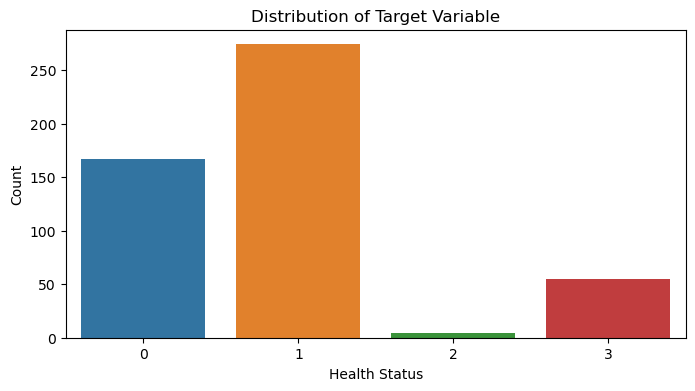

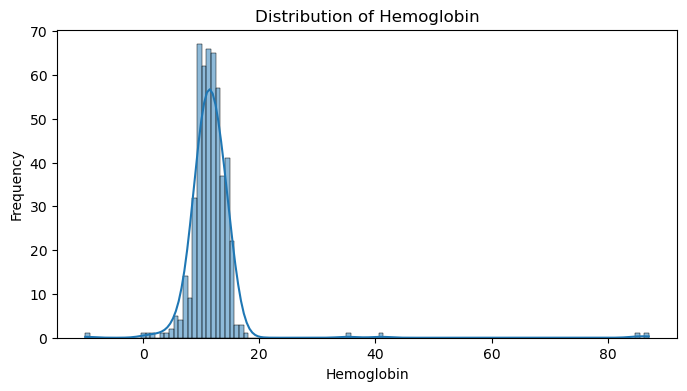

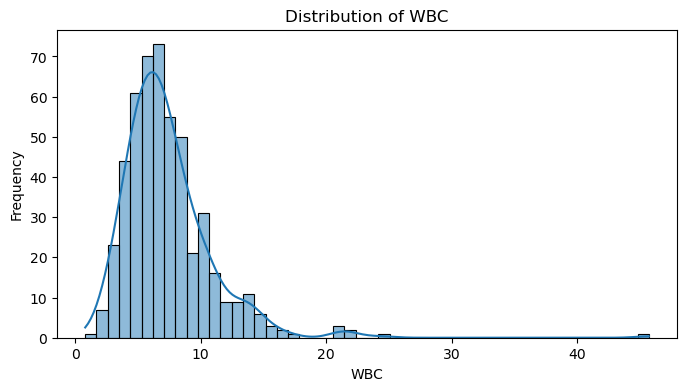

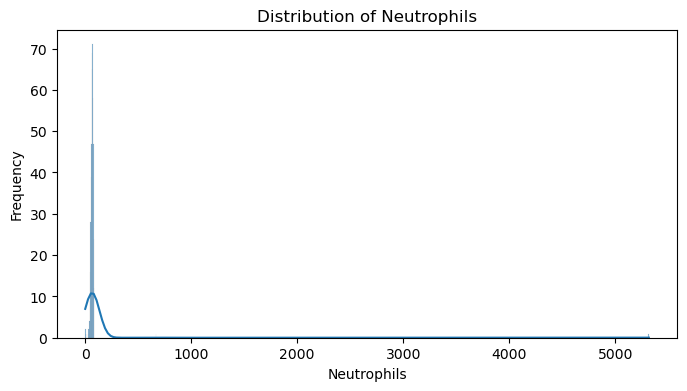

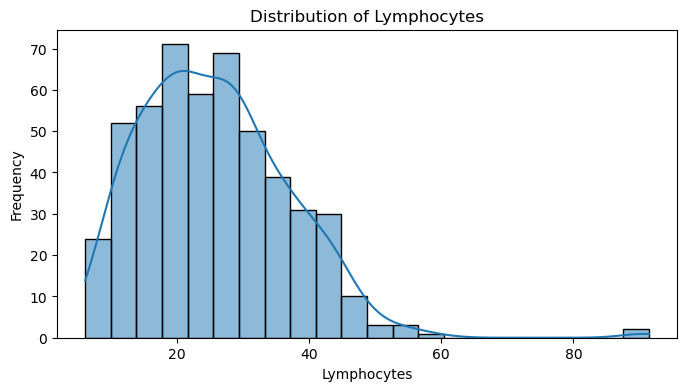

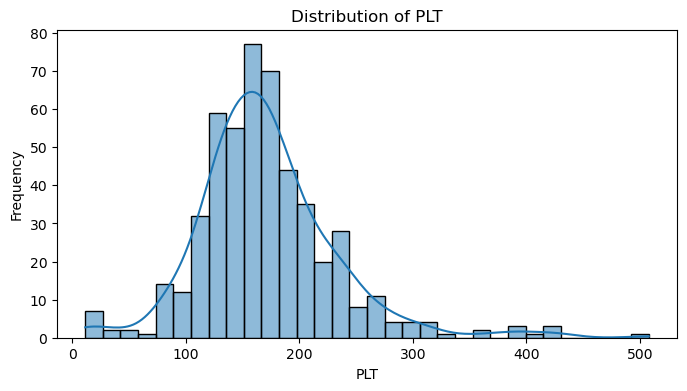

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
tqdm.pandas()

# Function to read all sheets from an Excel file
def read_all_sheets_from_excel(path: str) -> dict:
    all_sheets = pd.read_excel(path, sheet_name=None)
    dataframes = {}
    for sheet_name, df in all_sheets.items():
        # Strip whitespace from column names
        df = df.rename(columns=lambda x: x.strip() if isinstance(x, str) else x)
        # Strip whitespace from cells
        df = df.progress_apply(lambda col: col.str.strip() if col.dtype == "object" else col)
        dataframes[sheet_name] = df
    return dataframes

# Load the data
dataframes = read_all_sheets_from_excel('Data Entry 1.xlsx')

# Assuming 'dataframes' is a dictionary containing all sheets, we use the first sheet
# as it's the only one mentioned so far
# Extract the first sheet dataframe
df = list(dataframes.values())[0]

# Plot the distribution of the target variable
plt.figure(figsize=(8, 4))
sns.countplot(x='Target', data=df)
plt.title('Distribution of Target Variable')
plt.xlabel('Health Status')
plt.ylabel('Count')
plt.show()

# Plot distributions of a few features
features_to_plot = ['Hemoglobin', 'WBC', 'Neutrophils', 'Lymphocytes', 'PLT']
for feature in features_to_plot:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True)
    plt.title('Distribution of ' + feature)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()
    plt.show()

###### 

In [33]:
# import pandas as pd

# df_2 = []

# Hemoglobin = input('Enter Hemoglobin: ')
# Neutrophils = input('Enter Neutrophils: ')
# Lymphocytes = input('Enter Lymphocytes: ')
# MPV = input('Enter MPV: ')
# PCT = input('Enter PCT: ')
# PDW = input('Enter PDW: ')
# RBC = input('Enter RBC: ')
# HCT = input('Enter HCT: ')
# MCV = input('Enter MCV: ')
# MCH = input('Enter MCH: ')
# MCHC = input('Enter MCHC: ')
# RDWCV = input('Enter RDWCV: ')
# RDWSD = input('Enter RDWSD: ')
# PLCR = input('Enter PLCR: ')
# PLT = input('Enter PLT: ')
# WBC = input('Enter WBC: ')

# data = {
#     'Hemoglobin': Hemoglobin,
#     'Neutrophils': Neutrophils,
#     'Lymphocytes': Lymphocytes,
#     'MPV': MPV,
#     'PCT': PCT,
#     'PDW': PDW,
#     'RBC': RBC,
#     'HCT': HCT,
#     'MCV': MCV,
#     'MCH': MCH,
#     'MCHC': MCHC,
#     'RDWCV': RDWCV,
#     'RDWSD': RDWSD,
#     'PLCR': PLCR,
#     'PLT': PLT,
#     'WBC': WBC
# }

# df_2.append(data)
# dataframe = pd.DataFrame(df_2)
# numerical_features_m = dataframe.select_dtypes(include=['int64', 'float64']).columns
# preprocessor.fit(numerical_features_m )
# numerical_features_m_transformed = preprocessor.transform(numerical_features_m)
# predict=gb_model.predict(numerical_features_m_transformed)
# print(predict)
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier

# Create an empty list to store data
df_2 = []

# Collect user input
Hemoglobin = float(input('Enter Hemoglobin: '))
Neutrophils = float(input('Enter Neutrophils: '))
Lymphocytes = float(input('Enter Lymphocytes: '))
MPV = float(input('Enter MPV: '))
PCT = float(input('Enter PCT: '))
PDW = float(input('Enter PDW: '))
RBC = float(input('Enter RBC: '))
HCT = float(input('Enter HCT: '))
MCV = float(input('Enter MCV: '))
MCH = float(input('Enter MCH: '))
MCHC = float(input('Enter MCHC: '))
RDWCV = float(input('Enter RDWCV: '))
RDWSD = float(input('Enter RDWSD: '))
PLCR = float(input('Enter PLCR: '))
PLT = float(input('Enter PLT: '))
WBC = float(input('Enter WBC: '))



data = {
    'Hemoglobin': Hemoglobin,
    'Neutrophils': Neutrophils,
    'Lymphocytes': Lymphocytes,
    'MPV': MPV,
    'PCT': PCT,
    'PDW': PDW,
    'RBC': RBC,
    'HCT': HCT,
    'MCV': MCV,
    'MCH': MCH,
    'MCHC': MCHC,
    'RDWCV': RDWCV,
    'RDWSD': RDWSD,
    'PLCR': PLCR,
    'PLT': PLT,
    'WBC': WBC
}


df_2.append(data)

# Create a DataFrame from the list
dataframe = pd.DataFrame(df_2)

# Extract numerical columns for preprocessing
numerical_features = dataframe.select_dtypes(include=['float64']).columns

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    
    
    
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ]
)

# Fit and transform the data
numerical_features_transformed = preprocessor.fit_transform(dataframe)

# Assuming gb_model is already defined
predict = gb_model.predict(numerical_features_transformed)
print(predict)


Enter Hemoglobin: 11.3
Enter Neutrophils: 44
Enter Lymphocytes: 50
Enter MPV: 7.9
Enter PCT: 0.432
Enter PDW: 15.7
Enter RBC: 4.72
Enter HCT: 35.4
Enter MCV: 75
Enter MCH: 23.9
Enter MCHC: 31.9
Enter RDWCV: 15.3
Enter RDWSD: 48.2
Enter PLCR: 17
Enter PLT: 4000
Enter WBC: 3000
[1]


In [ ]:
df.sample(5)